In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'app.py', 'Cardiovascular_Disease_Prediction.ipynb', 'cardio_train.csv', 'main.py', 'Procfile', 'templates']


In [2]:
dataset = pd.read_csv("cardio_train.csv",sep=';')

Shape of dataset

In [3]:
dataset.shape

(69301, 13)

Printing out a few columns

In [4]:
dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:

dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.853970,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.755503,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,1.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
#Luckily, we have no missing values

Removing id column as it has no relevance for our model

In [8]:
dataset.drop(labels='id',axis=1,inplace=True)

In [9]:
dataset.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


Let's understand our columns better:

In [10]:

info = ["age in days","1: male, 0: female","Height in cm","Weight in kg","Systolic blood pressure ","Diastolic blood pressure","1: normal, 2: above normal, 3: well above normal","1: normal, 2: above normal, 3: well above normal","Smoking","Alcohol intake","Physical activity","Presence or absence of cardiovascular disease "]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age in days
gender:			1: male, 0: female
height:			Height in cm
weight:			Weight in kg
ap_hi:			Systolic blood pressure 
ap_lo:			Diastolic blood pressure
cholesterol:			1: normal, 2: above normal, 3: well above normal
gluc:			1: normal, 2: above normal, 3: well above normal
smoke:			Smoking
alco:			Alcohol intake
active:			Physical activity
cardio:			Presence or absence of cardiovascular disease 


Analysing the 'target' variable

In [11]:
dataset["cardio"].describe()

count    69301.000000
mean         0.499589
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

In [12]:
dataset["cardio"].unique()

array([0, 1], dtype=int64)

Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [13]:
print(dataset.corr()["cardio"].abs().sort_values(ascending=False))

cardio         1.000000
age            0.238095
cholesterol    0.220752
weight         0.182094
gluc           0.089062
ap_lo          0.065290
ap_hi          0.054213
active         0.035592
smoke          0.015225
height         0.011015
gender         0.008592
alco           0.007217
Name: cardio, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'alco' and 'gender' are very weakly correlated.

# Exploratory Data Analysis (EDA)

First, analysing the target variable:

0    34679
1    34622
Name: cardio, dtype: int64


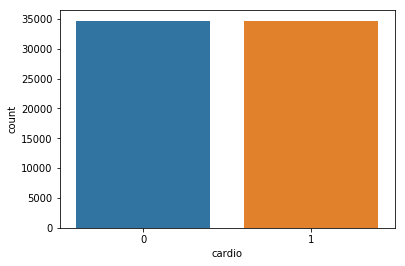

In [15]:
y = dataset["cardio"]

sns.countplot(y)


target_temp = dataset.cardio.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/69301,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/69301,2)))

Percentage of patience without heart problems: 50.04
Percentage of patience with heart problems: 49.96


Analysing the 'Gender' feature

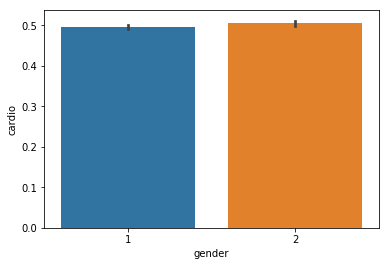

In [17]:
sns.barplot(dataset["gender"],y)

As we had checked that gender has very less correlation with cardio, now we can see there is no wast diffrence in gender to diagnose cardiovascular disease.

In [18]:
#Analysing the 'Cholesterol ' feature

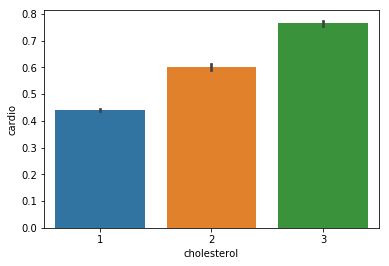

In [19]:
sns.barplot(dataset["cholesterol"],y)

We notice, that chilesterol level of '3', i.e. the ones with well above normal level are much likely to have heart problems

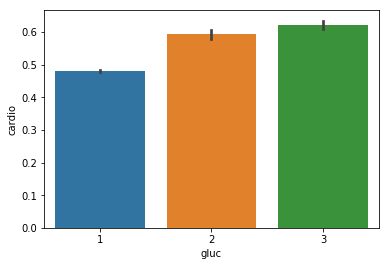

In [20]:
sns.barplot(dataset["gluc"],y)

Here also we notice, that people with glucose level of '3', i.e. the ones with well above normal level are much likely to have heart problems

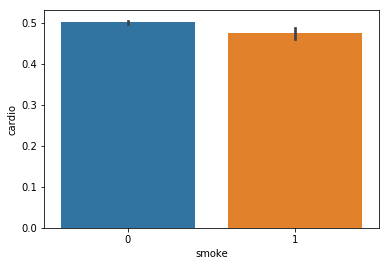

In [21]:
sns.barplot(dataset["smoke"],y)

Astosnishingly here it is showing that there is no vast diffrence of having cardiovascular disease for smoker or non-smoker

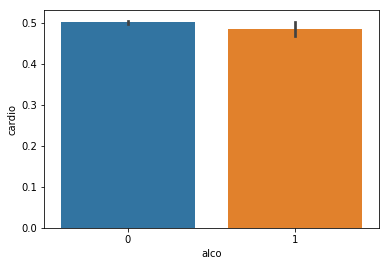

In [22]:
sns.barplot(dataset["alco"],y)

As we had seen above also that the correlation of having cardiovascular disease and alcohol was very low and in the barplot also it is proving the same

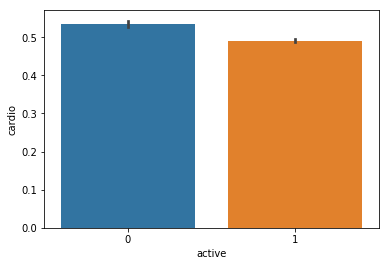

In [23]:
sns.barplot(dataset["active"],y)

People who are not physically active are more likely to have cardiovascular disease.

In [24]:
dataset['Days in a year']=365

In [25]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Days in a year
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,365
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,365
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,365
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,365
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,365


In [26]:
dataset['age in years']=dataset['age']/ dataset['Days in a year']

In [27]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Days in a year,age in years
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,365,61.558904
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,365,40.131507
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,365,60.002740
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,365,39.860274
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,365,64.090411


In [29]:
dataset.drop(['age','Days in a year'],axis=1,inplace=True)

In [30]:
dataset.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
0,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,1,155,62.0,120,80,1,1,0,0,1,0,64.090411


# Continuous

In [33]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(dataset[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='cardio', y=attribute, data=dataset, ax=axes[ax_index][1])

[None, None, None]

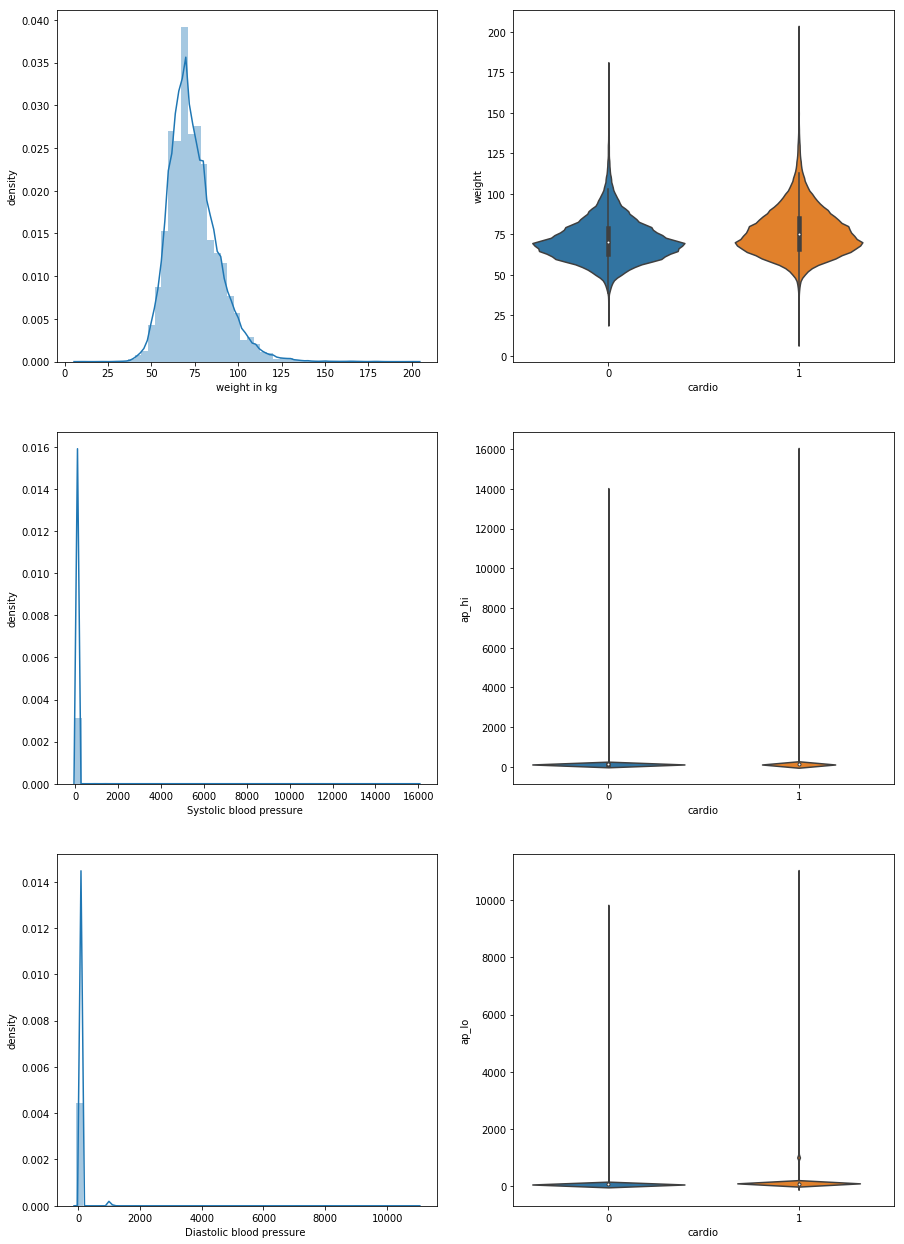

In [34]:
continuous = [('weight', 'weight in kg'), 
              ('ap_hi', 'Systolic blood pressure '), 
              ('ap_lo', 'Diastolic blood pressure '),]
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
[plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [35]:
dataset = pd.get_dummies(dataset, columns = ["gender","cholesterol","gluc","smoke","alco","active"],drop_first=True)

In [36]:
dataset.head()

,height,weight,ap_hi,ap_lo,cardio,age in years,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,155,69.0,130,80,0,61.558904,0,1,0,1,0,0,0,1
1,163,71.0,110,70,1,40.131507,0,0,0,0,0,0,0,1
2,165,70.0,120,80,0,60.002740,0,0,0,0,0,0,0,1
3,165,85.0,120,80,0,39.860274,1,0,0,0,0,1,1,1
4,155,62.0,120,80,0,64.090411,0,0,0,0,0,0,0,1


Now, I will use the StandardScaler from sklearn to scale my dataset.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
standardScaler = StandardScaler()
columns_to_scale = ['age in years', 'height', 'weight', 'ap_hi', 'ap_lo']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [39]:
from sklearn import preprocessing

In [40]:
# create the normalizer and fit it 
preprocessing.Normalizer().fit_transform(dataset)

array([[-0.46897784, -0.14868341,  0.00304383, ...,  0.        ,
         0.        ,  0.41102374],
       [-0.06817713, -0.09145045, -0.05003173, ...,  0.        ,
         0.        ,  0.41066312],
       [ 0.05396942, -0.20289429, -0.03972494, ...,  0.        ,
         0.        ,  0.6943335 ],
       ...,
       [ 0.60966224,  0.57469294,  0.08870688, ...,  0.        ,
         0.2684036 ,  0.        ],
       [-0.0887167 , -0.0818487 ,  0.02122287, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41853185, -0.09329811, -0.03485046, ...,  0.        ,
         0.        ,  0.60913485]])

# Train Test split

In [41]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("cardio",axis=1)
target = dataset["cardio"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [42]:
X_train.shape

(55440, 13)

In [43]:
X_test.shape

(13861, 13)

In [44]:
Y_train.shape

(55440,)

In [45]:
Y_test.shape

(13861,)

# Model Fitting

In [46]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [48]:
Y_pred_lr.shape

(13861,)

In [49]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 72.09 %


# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [51]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 58.42 %


SVM

In [64]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [65]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 73.31 %


# K Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 65.14 %


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 63.75 %


# Random Forest

In [58]:

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [59]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 70.92 %


In [66]:
#SVC with rbf kernel has the best accuracy score.

In [77]:
import pickle
# open a file, where you ant to store the data
file = open('SVM_classifier_model.pkl', 'wb')

# dump information to that file
pickle.dump(sv, file)